In [ ]:
!pip install pandas
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
!pip install nltk scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv("/Users/BibhashCharanRaya/Downloads/truevsfakenews.csv")

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishanprajapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nishanprajapati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nishanprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df["cleaned_text"] = df["text"].apply(clean_text)

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_text"])
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])
word_index = tokenizer.word_index

In [ ]:
# Padding based on 95th percentile length
seq_lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(seq_lengths, 95))
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

In [ ]:
# Encode labels
label_map = {"true": 1, "fake": 0}
labels = df["label"].map(label_map).values

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
print("Preprocessing done!")
print(f"Max sequence length (95th percentile): {max_len}")
print(f"Vocabulary size: {len(word_index)}")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Preprocessing done!
Max sequence length (95th percentile): 496
Vocabulary size: 122082
Training samples: 16000, Testing samples: 4000


In [ ]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


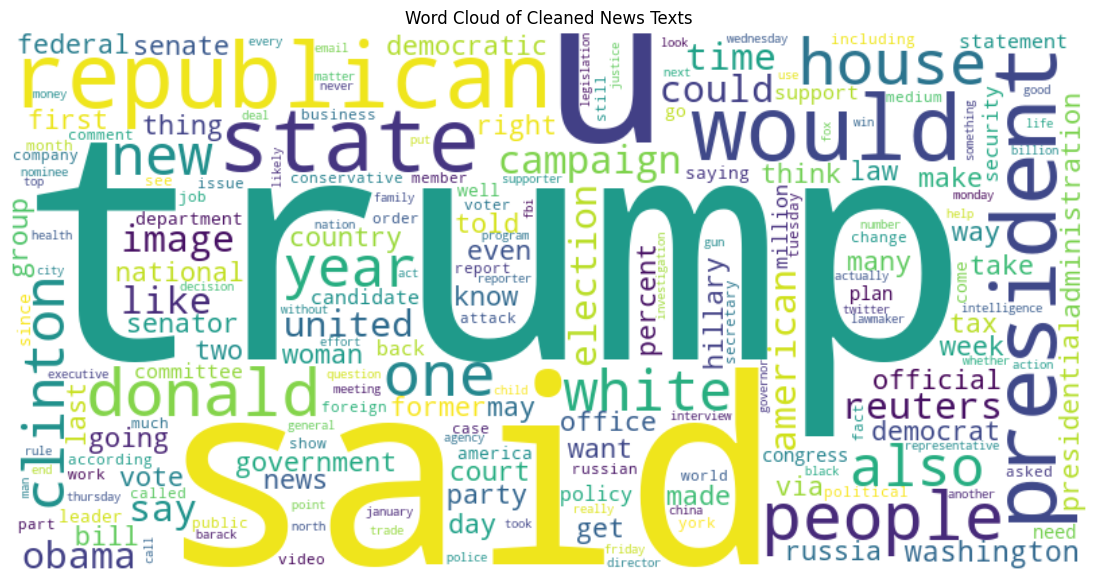

[('trump', 97596), ('said', 61119), ('u', 35046), ('republican', 30221), ('would', 30208), ('president', 29301), ('state', 28381), ('people', 20885), ('donald', 20263), ('house', 18812), ('one', 18021), ('new', 14965), ('also', 14841), ('year', 14717), ('clinton', 14623), ('white', 14584), ('campaign', 14078), ('time', 13353), ('image', 12987), ('reuters', 12694)]


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word frequencies
word_freq = Counter(" ".join(df['cleaned_text']).split())

# Plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned News Texts")
plt.show()

# Print the 20 most common words
print(word_freq.most_common(20))

In [ ]:
Model Building (Simple RNN)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.5164 - loss: 0.6899 - val_accuracy: 0.5515 - val_loss: 0.6744
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.5328 - loss: 0.6679 - val_accuracy: 0.5560 - val_loss: 0.6728
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.5320 - loss: 0.6686 - val_accuracy: 0.4750 - val_loss: 0.6863
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.5354 - loss: 0.6576 - val_accuracy: 0.5477 - val_loss: 0.6809
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.5403 - loss: 0.6635 - val_accuracy: 0.5420 - val_loss: 0.6841


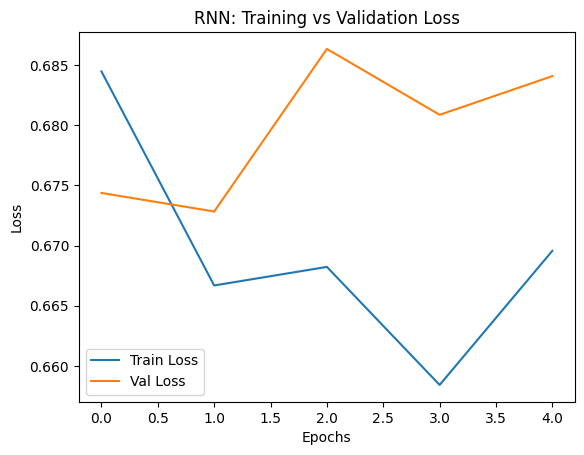

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

✅ RNN Accuracy: 0.556

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      2055
           1       0.92      0.10      0.17      1945

    accuracy                           0.56      4000
   macro avg       0.73      0.54      0.43      4000
weighted avg       0.72      0.56      0.44      4000


🧩 Confusion Matrix:
[[2039   16]
 [1760  185]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Model parameters
vocab_size = len(word_index) + 1  # +1 for padding token
embedding_dim = 100
input_length = X_train.shape[1]

# Build the Simple RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot training vs validation loss
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title("RNN: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the model
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

print("\n✅ RNN Accuracy:", accuracy_score(y_test, y_pred_rnn))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_rnn))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rnn))

In [ ]:
LSTM with Trainable Embedding

Epoch 1/10


/Users/nishanprajapati/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 294ms/step - accuracy: 0.5295 - loss: 0.6909 - val_accuracy: 0.5545 - val_loss: 0.6689
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 293ms/step - accuracy: 0.5420 - loss: 0.6627 - val_accuracy: 0.4900 - val_loss: 0.6693
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 291ms/step - accuracy: 0.5353 - loss: 0.6632 - val_accuracy: 0.5537 - val_loss: 0.6660
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 298ms/step - accuracy: 0.5532 - loss: 0.6525 - val_accuracy: 0.9645 - val_loss: 0.5122
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 364ms/step - accuracy: 0.9762 - loss: 0.2333 - val_accuracy: 0.9890 - val_loss: 0.0491
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 376ms/step - accuracy: 0.9933 - loss: 0.0416 - val_accuracy: 0.9902 - val_loss: 0.0486
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 368ms/step - accuracy: 0.9952 - loss: 0.0307 - val_accuracy: 0.9910 - val_loss: 0.0400
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 372ms/step - accuracy: 0.9910 - loss: 0.0362 - val

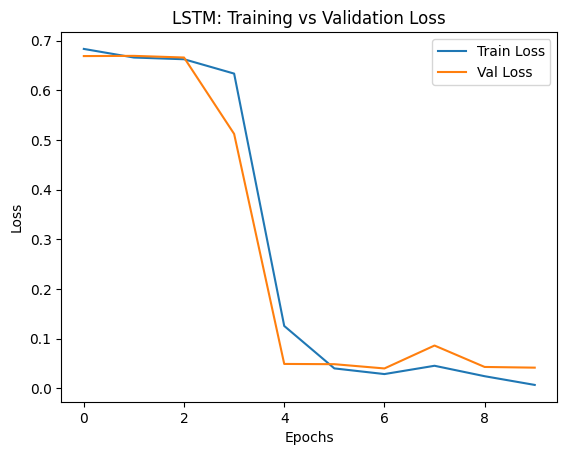

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step

✅ LSTM Accuracy: 0.991

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2055
           1       0.99      0.99      0.99      1945

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000


🧩 Confusion Matrix:
[[2030   25]
 [  11 1934]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Model parameters
vocab_size = len(word_index) + 1
embedding_dim = 100
input_length = X_train.shape[1]

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot training vs validation loss
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title("LSTM: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the model
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

print("\n✅ LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))


In [ ]:
LSTM with Pretrained Word2Vec

In [ ]:
!pip uninstall -y numpy gensim

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1


In [ ]:
!pip install numpy==1.23.5
!pip install scipy==1.9.3
!pip install gensim==4.3.1


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 7.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1

[notice] A new re

In [ ]:
import gensim.downloader as api
embedding_model = api.load("glove-wiki-gigaword-100")

/Users/nishanprajapati/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[=================---------------------------------] 34.2% 43.8/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.1% 119.2/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_text"])
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])
word_index = tokenizer.word_index

In [ ]:
import numpy as np

# Define both variables first
vocab_size = len(word_index) + 1
embedding_dim = 100  # Must match GloVe vector dimension (e.g., 50, 100, 200)

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in embedding_model:
        embedding_vector = embedding_model[word]
        embedding_matrix[i] = embedding_vector

In [ ]:
vocab_size = len(word_index) + 1  # total number of tokens
embedding_dim = 100  # must match the dimension of the GloVe you're using


/Users/nishanprajapati/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 212ms/step - accuracy: 0.6064 - loss: 0.6164 - val_accuracy: 0.9070 - val_loss: 0.2671
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9108 - loss: 0.2751 - val_accuracy: 0.9480 - val_loss: 0.2014
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.8720 - loss: 0.3053 - val_accuracy: 0.6808 - val_loss: 0.5411
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.8880 - loss: 0.2829 - val_accuracy: 0.9582 - val_loss: 0.1797
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 230ms/step - accuracy: 0.9216 - loss: 0.2194 - val_accuracy: 0.9438 - val_loss: 0.1898
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9435 - loss: 0.1801 - val_accuracy: 0.9503 - val_loss: 0.1676
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.9484 - loss: 0.1664 - val_accuracy: 0.9590 - val_loss: 0.1456
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9326 - loss: 0

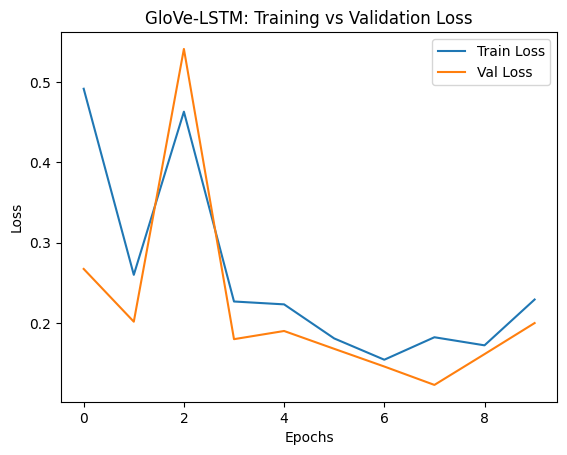

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step

✅ GloVe-LSTM Accuracy: 0.965

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2055
           1       0.96      0.97      0.96      1945

    accuracy                           0.96      4000
   macro avg       0.96      0.97      0.96      4000
weighted avg       0.97      0.96      0.97      4000


🧩 Confusion Matrix:
[[1980   75]
 [  65 1880]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Build model with pretrained GloVe embeddings
model_glove = Sequential()
model_glove.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=X_train.shape[1],
    trainable=False  # set to True if you want to fine-tune
))
model_glove.add(LSTM(64))
model_glove.add(Dense(1, activation='sigmoid'))

# Compile
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history_glove = model_glove.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot loss
plt.plot(history_glove.history['loss'], label='Train Loss')
plt.plot(history_glove.history['val_loss'], label='Val Loss')
plt.title("GloVe-LSTM: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate
y_pred_glove = (model_glove.predict(X_test) > 0.5).astype("int32")

print("\n✅ GloVe-LSTM Accuracy:", accuracy_score(y_test, y_pred_glove))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_glove))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_glove))


In [ ]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 8.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
import gradio as gr

# Define prediction function
def classify_news(text):
    cleaned = clean_text(text)  # Use your same preprocessing function
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=X_train.shape[1], padding='post')
    prediction = model_glove.predict(padded)[0][0]
    label = "True News" if prediction > 0.5 else "Fake News"
    confidence = f"{prediction:.2f}" if prediction > 0.5 else f"{1 - prediction:.2f}"
    return f"{label} (Confidence: {confidence})"

/Users/nishanprajapati/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
interface = gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(lines=4, placeholder="Enter news content here..."),
    outputs="text",
    title="Real-Time News Classifier",
    description="Enter a news headline or paragraph to classify it as Fake or True using an LSTM model with GloVe embeddings."
)

interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
